**Description:** We want to use different ML (supervised and unsupervised) approaches to predict churns of subscriptions of the german newspaper “Die Zeit”. Supervised ML methods can be used to predict (classification methods) subscription churns based on the given dataset. Since a large number of features exists, feature selection as part of an extensive EDA is essential. Unsupervised ML methods could be used first to do clustering on the dataset to identify if there are certain “groups of subscribers”, who share certain features. This clustering could be used to investigate subscriber group specific churn mitigation methods (not only writing emails, as given in the dataset description).

**Project Name:** Churn Predition - Die Zeit

**Team:** Carlotta Ulm, Silas Mederer, Jonas Bechthold

**Date:** 2020-10-26 to 2020-11-27

# Setting up environment and imports

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import math
import itertools
from time import time

# own modules
import eda_methods as eda

# visualization
import seaborn as sns
#sns.set(style="white")  
sns.set_theme()

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from pandas.plotting import scatter_matrix

# pandas profiling
from pandas_profiling import ProfileReport

# warnings handler
import warnings
warnings.filterwarnings("ignore")

random_state = 100           # Ensures modeling results can be replicated
np.random.seed(42)

# Display Options for pandas
pd.set_option('display.max_columns', None) # Sets maximum columns displayed in tables
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

# Variables for plot sizes
matplotlib.rc('font', size=20)          # controls default text sizes
matplotlib.rc('axes', titlesize=16)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=18)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=18)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=18)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=14)    # legend fontsize
matplotlib.rc('figure', titlesize=20)

####################################################
# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import fbeta_score, accuracy_score, f1_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer 
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#geodaten
import geopandas as gpd

# Business Understanding 

Please check the [wiki page: Business understanding (publishing and news)](https://github.com/jb-ds2020/nf-ds3-capstone-churn-prevention/wiki/Business-understanding-(publishing-and-news)).

## General

## Background


## Key Questions

## Dataset Description

Let's get an idea about the columns and find out what they mean:

In [2]:
df = pd.read_csv('data/f_chtr_churn_traintable_nf.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161760 entries, 0 to 161759
Columns: 170 entries, Unnamed: 0 to date_x
dtypes: float64(31), int64(121), object(18)
memory usage: 209.8+ MB


In [ ]:
df.head()

In [ ]:
df.tail(1)

In [ ]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
columnlist = list(df.columns) 
columnlist

In [ ]:
df.describe_plus().round(2)

## Get an idea of the column names by sampling

In [9]:
df.sample(2)

auftrag_new_id liefer_beginn_evt   kanal  \
35384  772EC65E-50E3-49CA-98D8-2003C4DE5DF7  2018-08-16        andere   
62036  0C9FF4A4-E98C-4450-B5F4-7FC04CCA88AB  2013-02-21        andere   

        objekt_name aboform_name zahlung_rhythmus_name  lesedauer  \
35384  DIE ZEIT      Festabo      jährlich              21          
62036  ZEIT Digital  Festabo      jährlich              78          

       rechnungsmonat zahlung_weg_name  studentenabo plz_1 plz_2 plz_3  \
35384  0               Bankeinzug       1             1     10    105    
62036  0               Kreditkarte      0             7     70    701    

             ort  metropole land_iso_code  shop_kauf  unterbrechung anrede  \
35384  Berlin     1          DE            0          0              Herr    
62036  Stuttgart  1          DE            0          0              Herr    

            titel  avg_churn  zon_che_opt_in  zon_sit_opt_in  zon_zp_grey  \
35384  kein Titel  0.282302   0               0               0             
62036  kein Titel  0.114840   0               0               0             

       zon_premium  zon_boa  zon_kommentar  zon_sonstige  zon_zp_red  \
35384  0            0        0              0             0            
62036  0            0        0              0             0            

       zon_rawr  zon_community  zon_app_sonstige  zon_schach  \
35384  0         0              0                 0            
62036  0         0              0                 0            

       zon_blog_kommentare  zon_quiz  cnt_abo  cnt_abo_diezeit  \
35384  0                    0         4        2                 
62036  0                    0         6        3                 

       cnt_abo_diezeit_digital  cnt_abo_magazin  cnt_umwandlungsstatus2_dkey  \
35384  1                        1                2                             
62036  0                        1                1                             

      abo_registrierung_min  nl_zeitbrief  nl_zeitshop  nl_zeitverlag_hamburg  \
35384  2016-12-21 09:09:21   2             0            0                       
62036  2003-07-17 15:14:57   2             0            0                       

       nl_fdz_organisch  nl_blacklist_sum  nl_bounced_sum  nl_aktivitaet  \
35384  0                 0                 0               13              
62036  0                 1                 0               11              

      nl_registrierung_min  nl_sperrliste_sum  nl_opt_in_sum  boa_reg  \
35384  2016-12-20 07:38:02  0                  0              0         
62036  2008-01-26 20:04:41  0                  1              0         

       che_reg  sit_reg  sso_reg  received_anzahl_1w  received_anzahl_1m  \
35384  0        0        1        0                   0                    
62036  0        0        1        0                   0                    

       received_anzahl_3m  received_anzahl_6m  opened_anzahl_1w  \
35384  0                   0                   0                  
62036  0                   0                   0                  

       opened_anzahl_1m  opened_anzahl_3m  openedanzahl_6m  clicked_anzahl_1w  \
35384  0                 0                 0                0                   
62036  0                 0                 0                0                   

       clicked_anzahl_1m  clicked_anzahl_3m  clicked_anzahl_6m  \
35384  0                  0                  0                   
62036  0                  0                  0                   

       unsubscribed_anzahl_1w  unsubscribed_anzahl_1m  unsubscribed_anzahl_3m  \
35384  0                       0                       0                        
62036  0                       0                       0                        

       unsubscribed_anzahl_6m  openrate_1w  clickrate_1w  openrate_1m  \
35384  0                       0.0          0.0           0.0           
62036  0                       0.0          0.0           0.0           

       clickrate_1m  openrate_

## Dataset Overview with pandas profiling

In [10]:
# use pandas_profiling to create report
# save html to plots

# profile = ProfileReport(df)
# profile.to_file("plots/report.html")

In [11]:
from IPython.display import IFrame
IFrame(src='plots/pandas_profiling_report.html', width=1000, height=700)

## Target Metric


## Business Scenario

# Data Mining

# Data Cleaning
Purpose: Fix the inconsistencies within the data and handle the missing values

In [ ]:
eda.meta(df).T

In [ ]:
continues = df.select_dtypes(include=['float64','int64'])
print(f"numeric features {len(continues.columns)}")
categorial = df.select_dtypes(include="object")
print(f"object features  {len(categorial.columns)}")
print(f"shape {df.shape}")

## Conclusion

**Dataframe in general**
- The data set is complete and contains 161,760 entries and 169 features. There are some features that we will not be able to use. For example the label "churn" or the feature "date_x", "kuendigungs_eingangs_datum" or "avg_churn" which probably contains the values from the current churn-prediction-model.

**Missings**
- There are only two features with missing values. The feature "kuendigungs_eingangs_datum" is null if there is no notice of termination, so these nulls are correct. The other feature is "ort", we are able to engineer the "ort" by using the feature "plz_3".

**Dublicates**
- The feature "auftrag_new_id" is the only one with no dublicates. We will drop this, cause all these entries are unique given by the stakeholder to manage the contracts.

**Data types**
- There are 151 numeric features, a lot of them will be categorial. Also we have 18 object types.

# Data Exploration - EDA


In [12]:
def crosstab_evaluation(feature_column,target_column,relative=True):
    '''function to cross evaluate two features by a pandas cross table
    Inputs:
    feature_column: pandas Series of feature
    target_column: pandas Series of target (y-axis value)
    relative: False -> returns absolute values, True -> gives percentages
    
    Retunr:
    crosstable
    '''
    crosstable = pd.crosstab(feature_column,target_column)
    if relative:
        crosstable = crosstable.div(crosstable.sum(1),axis=0)
    
    return crosstable

def crosstab_barplot(crosstable,labellist,figsize_x=10,figsize_y=7,xlabelname='Default'):
    '''
    Function to plot a pandas crosstable. 
    
    Inputs:
    crosstable: a pandas crosstable
    labellist: a list with the labels of the data
    xlabelname: Name of the x axis feature
    '''
    crosstable.plot(kind='bar', stacked=True,figsize=(figsize_x,figsize_y))
    plt.xlabel(xlabelname)
    plt.ylabel('Frequency')
    
    #plt.title('Title');
    #plt.xticks(np.arange(2), ('60 months', '36 months',), fontsize=20)
    
    L=plt.legend(fontsize=20,loc=(1.04,0.83))
    L.get_texts()[0].set_text(labellist[0])
    L.get_texts()[1].set_text(labellist[1])

# Describe

In [ ]:
eda.describe_plus(df)

## Customer/Personal Features - Jonas

The following feature are considered as personal information and shortly described:
- anrede: Mr, Mrs
- titel: academic title
- plz_1: first letter of zip code
- plz_2: first two letters of zip code
- plz_3: first three letters of zip code
- ort: city
- metropole: is the city a metropolitan city
- land_iso_code: DE, A, CH (Germany, Austria, Switzerland)

### Anrede

In [13]:
legendlist = ['churn','no churn']

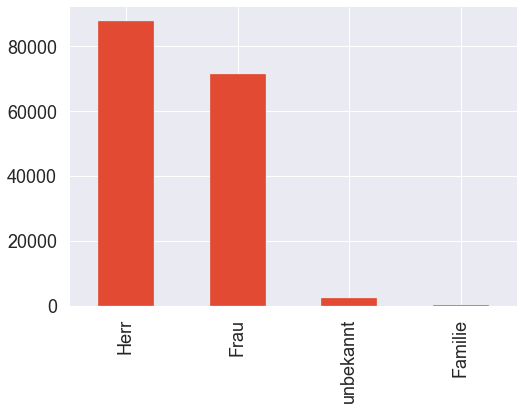

In [14]:
df.anrede.value_counts().plot(kind='bar');

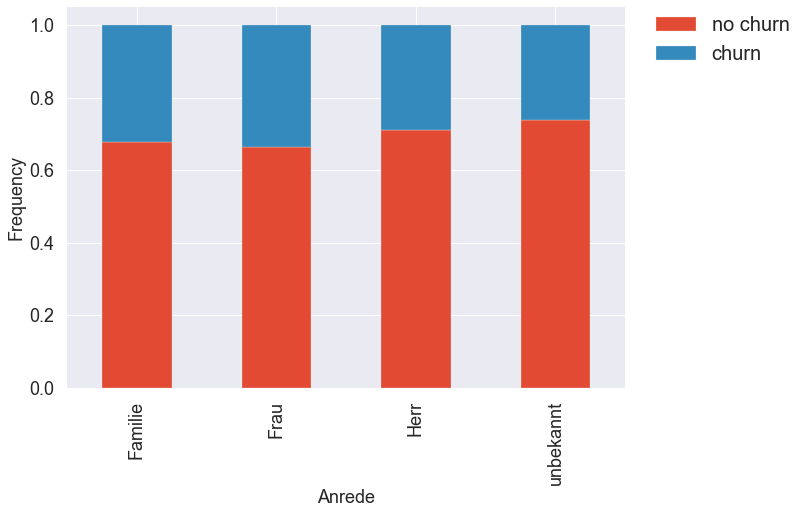

In [15]:
anrede_churn = crosstab_evaluation(df.anrede,df.churn)
crosstab_barplot(anrede_churn,['no churn','churn'],xlabelname='Anrede')

### Titel

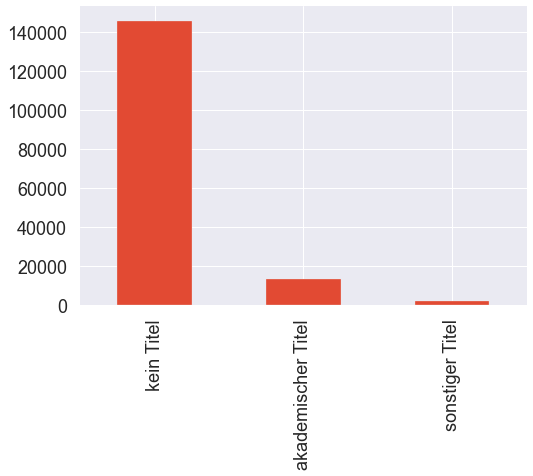

In [16]:
df.titel.value_counts().plot(kind='bar');

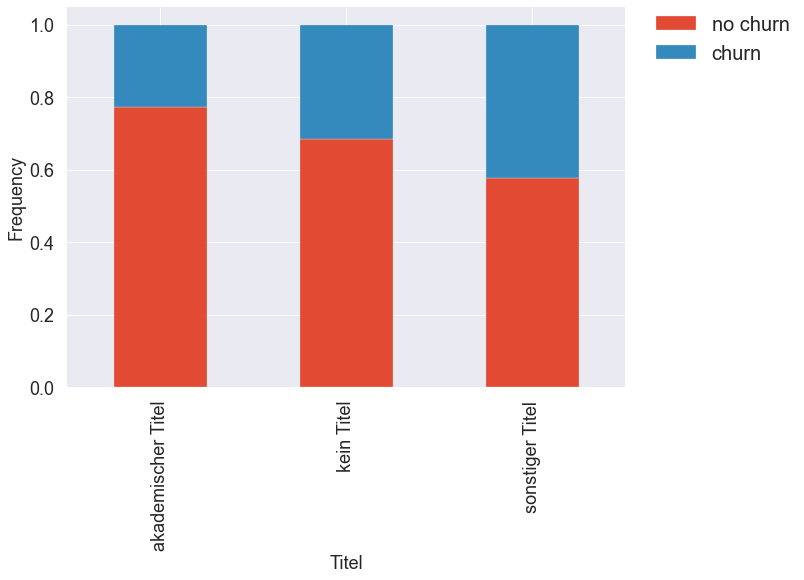

In [17]:
titel_churn = crosstab_evaluation(df.titel,df.churn)
crosstab_barplot(titel_churn,['no churn','churn'],xlabelname='Titel')

### PLZ 1 

Find the missing number of zip codes:

In [18]:
df_zip_xx = df[df.plz_1 == 'xx']
print('Number of missing zip codes entries:',df_zip_xx.shape[0])
print('Percentage of missing zip codes in total:',df_zip_xx.shape[0]/df.shape[0])

Number of missing zip codes entries: 19788
Percentage of missing zip codes in total: 0.12232937685459941


There are 19788 entries with no zip code, which is about 12 percent. 

In [19]:
df_zip_xx.ort.value_counts().nlargest(10)

Wien          3966
Zürich        1359
Basel         580 
Graz          573 
Innsbruck     406 
Salzburg      352 
Bern          347 
Linz          325 
Winterthur    148 
Luzern        134 
Name: ort, dtype: int64

The xx zip codes are all non german cities (e.g. Switzerland), so we could divide the dataset into germany and out of germany areas.

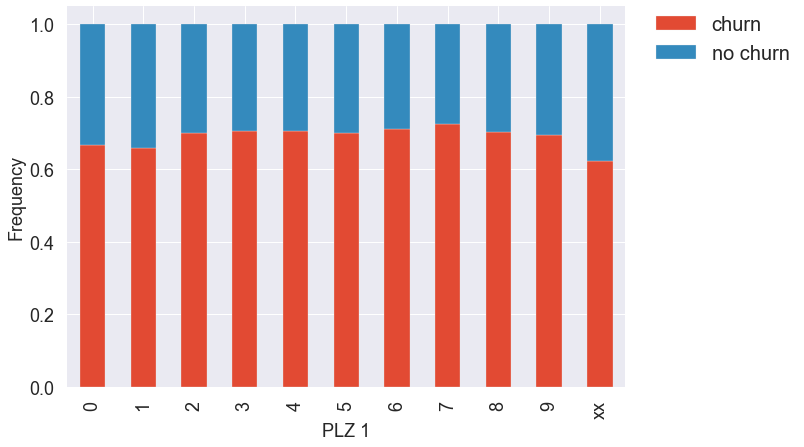

In [20]:
plz1_churn = crosstab_evaluation(df.plz_1,df.churn)
crosstab_barplot(plz1_churn,['churn','no churn'],xlabelname='PLZ 1')

### PLZ 2

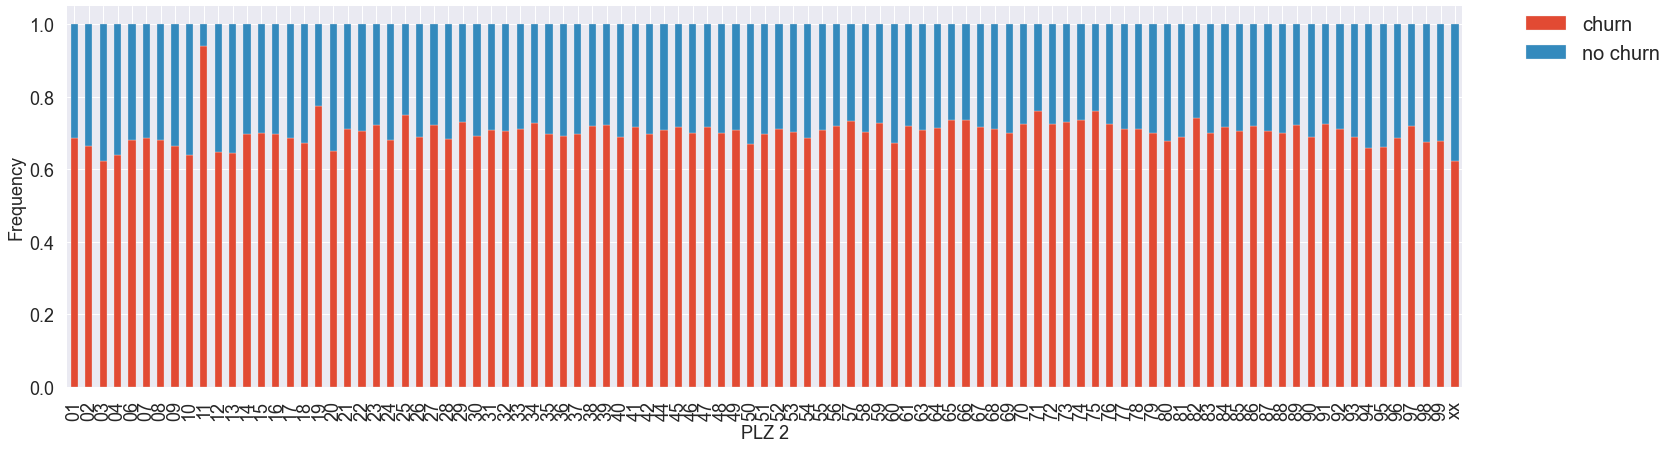

In [21]:
plz2_churn = crosstab_evaluation(df.plz_2,df.churn)
crosstab_barplot(plz2_churn,['churn','no churn'],xlabelname='PLZ 2',figsize_x=25)

In [22]:
# dataframe to map below
type(plz2_churn)

pandas.core.frame.DataFrame

### PLZ 3

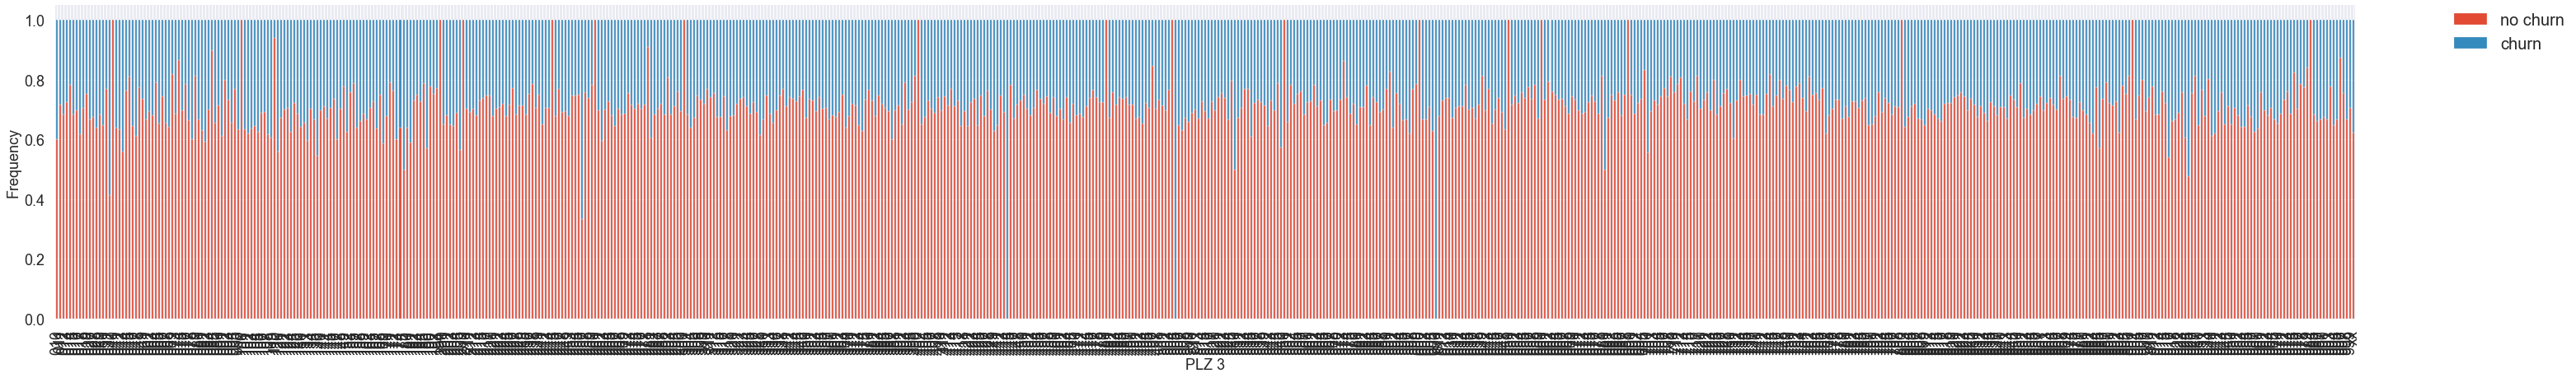

In [23]:
plz3_churn = crosstab_evaluation(df.plz_3,df.churn)
crosstab_barplot(plz3_churn,['no churn','churn'],xlabelname='PLZ 3',figsize_x=50)

Link zu geopandas für Deutschland: https://juanitorduz.github.io/germany_plots/

In [24]:
# geodata
plz_shape_df = gpd.read_file('data/plz-gebiete.shp', dtype={'plz': str})

plz_shape_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8706 entries, 0 to 8705
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   plz       8706 non-null   object  
 1   note      8706 non-null   object  
 2   geometry  8706 non-null   geometry
dtypes: geometry(1), object(2)
memory usage: 204.2+ KB


In [25]:
top_cities = {
    'Berlin': (13.404954, 52.520008), 
    'Cologne': (6.953101, 50.935173),
    'Düsseldorf': (6.782048, 51.227144),
    'Frankfurt am Main': (8.682127, 50.110924),
    'Hamburg': (9.993682, 53.551086),
    'Leipzig': (12.387772, 51.343479),
    'Munich': (11.576124, 48.137154),
    'Dortmund': (7.468554, 51.513400),
    'Stuttgart': (9.181332, 48.777128),
    'Nuremberg': (11.077438, 49.449820),
    'Hannover': (9.73322, 52.37052)
}

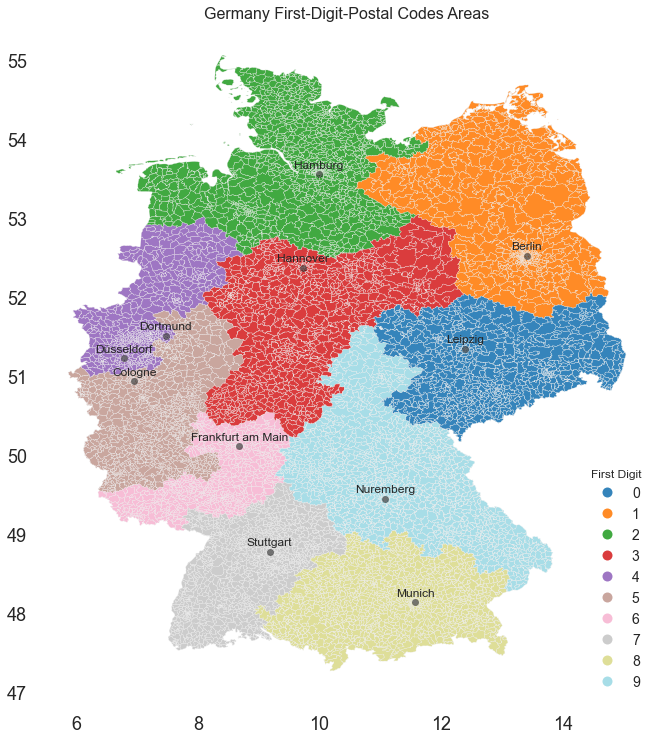

In [26]:
# Create feature.
plz_shape_df = plz_shape_df \
    .assign(first_dig_plz = lambda x: x['plz'].str.slice(start=0, stop=1))
fig, ax = plt.subplots(figsize=(11,16))

plz_shape_df.plot(
    ax=ax, 
    column='first_dig_plz', 
    categorical=True, 
    legend=True, 
    legend_kwds={'title':'First Digit', 'loc':'lower right'},
    cmap='tab20',
    alpha=0.9
)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Germany First-Digit-Postal Codes Areas', 
    aspect=1.3,
    facecolor='white'
);

In [27]:
plz_region_df = pd.read_csv(
    'data/zuordnung_plz_ort.csv', 
    sep=',', 
    dtype={'plz': str}
)

plz_region_df.drop('osm_id', axis=1, inplace=True)

plz_region_df.head()

ort    plz           bundesland
0  Aach    78267  Baden-Württemberg  
1  Aach    54298  Rheinland-Pfalz    
2  Aachen  52062  Nordrhein-Westfalen
3  Aachen  52064  Nordrhein-Westfalen
4  Aachen  52066  Nordrhein-Westfalen

In [28]:
# Merge data.
germany_df = pd.merge(
    left=plz_shape_df, 
    right=plz_region_df, 
    on='plz',
    how='inner'
)

germany_df.drop(['note'], axis=1, inplace=True)

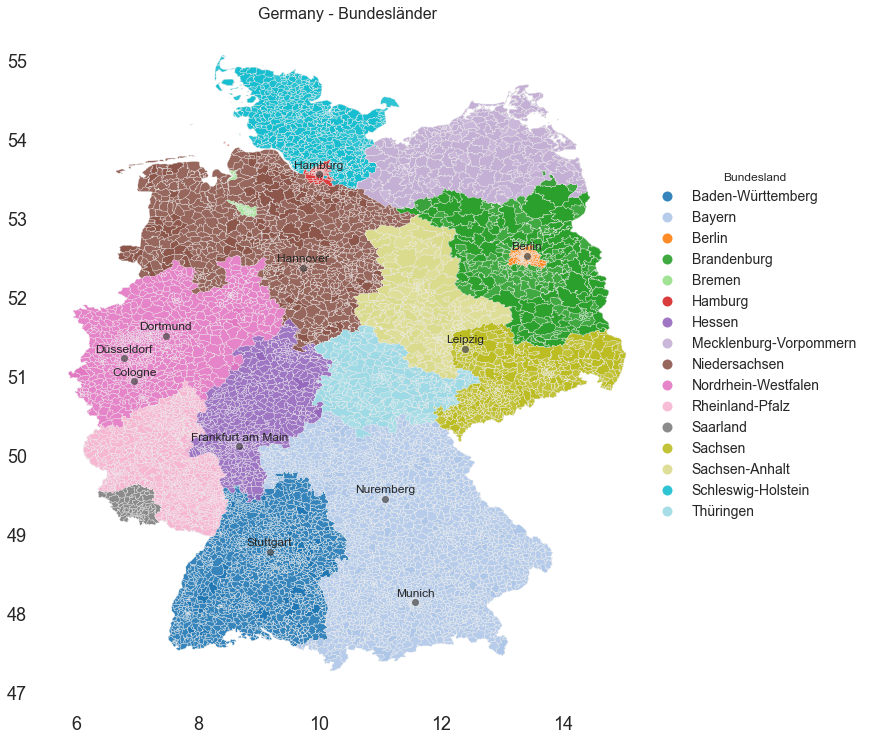

In [29]:
fig, ax = plt.subplots(figsize=(11,16))

germany_df.plot(
    ax=ax, 
    column='bundesland', 
    categorical=True, 
    legend=True, 
    legend_kwds={'title':'Bundesland', 'bbox_to_anchor': (1.35, 0.8)},
    cmap='tab20',
    alpha=0.9
)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Germany - Bundesländer', 
    aspect=1.3, 
    facecolor='white'
);

In [30]:
plz1_churn

churn         0         1
plz_1                    
0      0.667609  0.332391
1      0.660144  0.339856
2      0.700604  0.299396
3      0.706629  0.293371
4      0.704886  0.295114
5      0.699679  0.300321
6      0.711066  0.288934
7      0.724816  0.275184
8      0.704273  0.295727
9      0.696045  0.303955
xx     0.622903  0.377097

In [31]:
plz2_churn.index[0]

'01'

In [32]:
def convert_plz_1_to_prob(plz):
    index = str(plz)[0]
    #print(index)
    value = plz1_churn.iloc[int(index),1]
    return value

def convert_plz_2_to_prob(plz):
    index = str(plz)[0:2]
    #print(index)
    value = plz2_churn[plz2_churn.index == index].iloc[0,1]
    #print(value)
    return value

def convert_plz_3_to_prob(plz):
    index = str(plz)[0:3]
    #print(index)
    value = plz3_churn[plz3_churn.index == index].iloc[0,1]
    #print(value)
    return value

In [33]:
germany_df['churn_plz_1'] = germany_df.plz.apply(lambda x: convert_plz_1_to_prob(x))

In [34]:
germany_df['churn_plz_2'] = germany_df.plz.apply(lambda x: convert_plz_2_to_prob(x))

In [35]:
germany_df['churn_plz_3'] = germany_df.plz.apply(lambda x: convert_plz_3_to_prob(x))

In [36]:
plz_einwohner_df = pd.read_csv(
    'data/plz_einwohner.csv', 
    sep=',', 
    dtype={'plz': str, 'einwohner': int}
)

plz_einwohner_df.head()

plz  einwohner
0  01067  11957    
1  01069  25491    
2  01097  14811    
3  01099  28021    
4  01108  5876

In [37]:
# Merge data.
germany_df = pd.merge(
    left=germany_df, 
    right=plz_einwohner_df, 
    on='plz',
    how='left'
)

#germany_df.head()

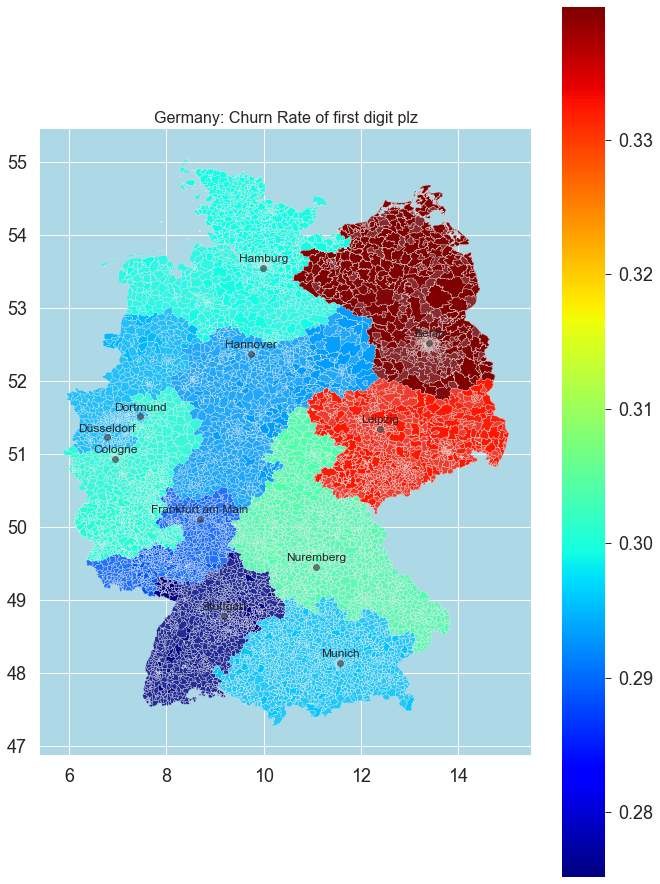

In [74]:
fig, ax = plt.subplots(figsize=(11,16))

germany_df.plot(
    ax=ax, 
    column='churn_plz_1', 
    categorical=False, 
    legend=True, 
    cmap='jet',
    alpha=0.8,

)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )
    
ax.set(
    title='Germany: Churn Rate of first digit plz', 
    aspect=1.5, 
    facecolor='lightblue'
);
fig.savefig('plots/churn_rate_landscape_plz_1_digit.png',dpi=300)

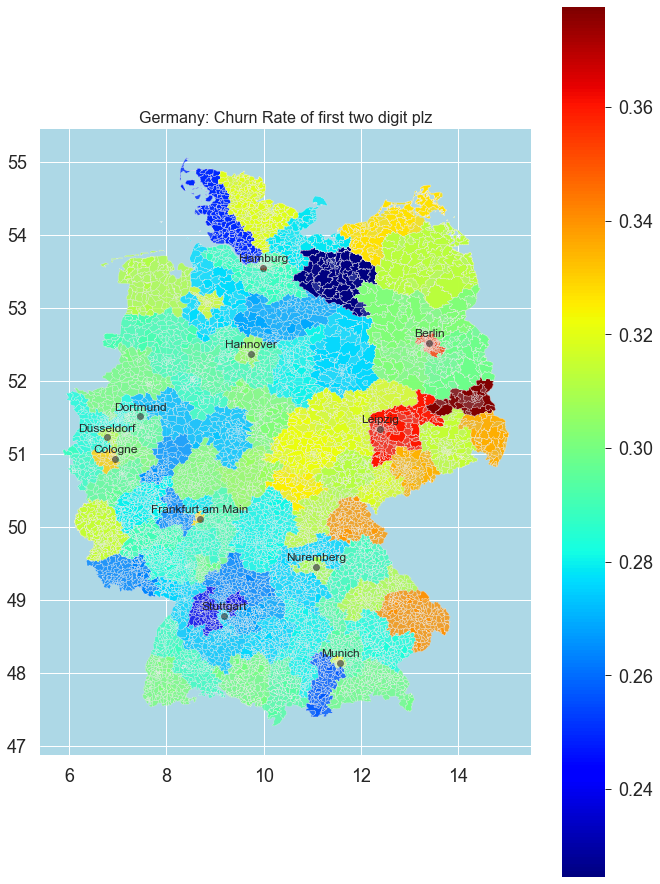

In [75]:
fig, ax = plt.subplots(figsize=(11,16))

germany_df.plot(
    ax=ax, 
    column='churn_plz_2', 
    categorical=False, 
    legend=True, 
    cmap='jet',
    alpha=0.8,

)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )
    
ax.set(
    title='Germany: Churn Rate of first two digit plz', 
    aspect=1.5, 
    facecolor='lightblue'
);
fig.savefig('plots/churn_rate_landscape_plz_2_digit.png',dpi=300)

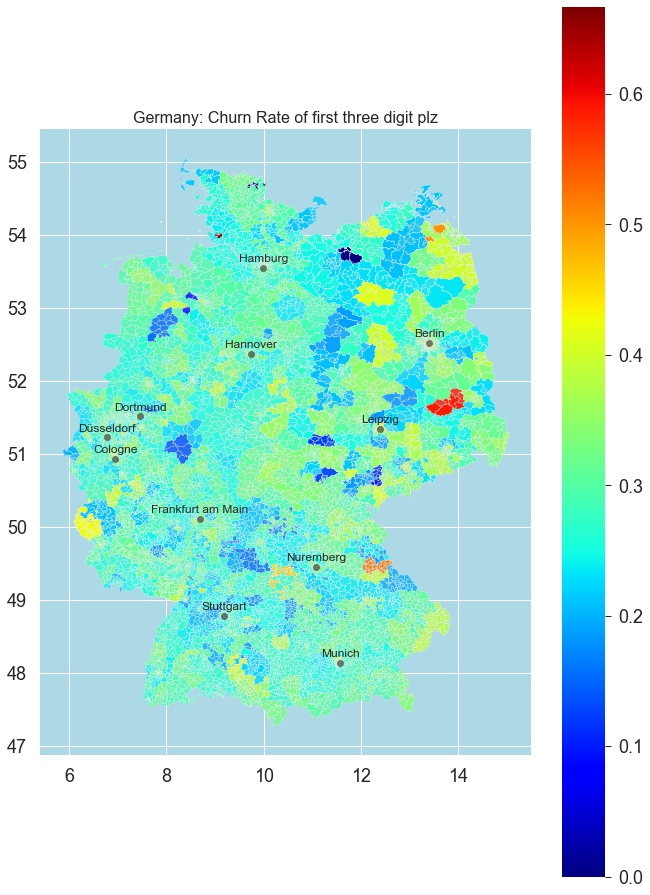

In [76]:
fig, ax = plt.subplots(figsize=(11,16))

germany_df.plot(
    ax=ax, 
    column='churn_plz_3', 
    categorical=False, 
    legend=True, 
    cmap='jet',
    alpha=0.8,

)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )
    
ax.set(
    title='Germany: Churn Rate of first three digit plz', 
    aspect=1.5, 
    facecolor='lightblue'
);
fig.savefig('plots/churn_rate_landscape_plz_3_digit.png',dpi=300)

### Metropole

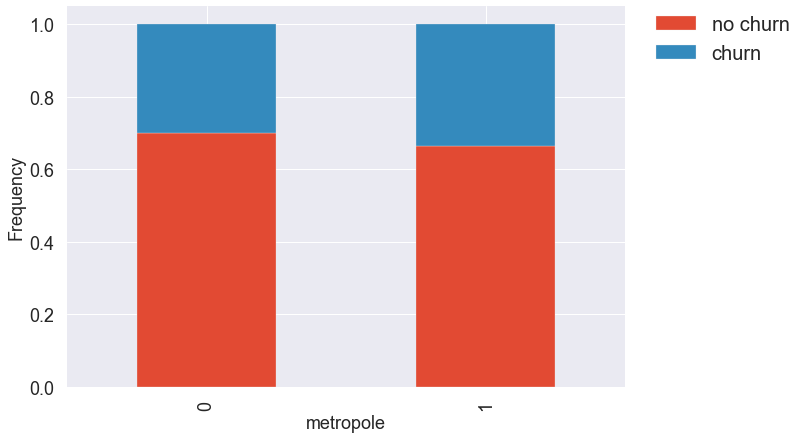

In [41]:
metropole_churn = crosstab_evaluation(df.metropole,df.churn)
crosstab_barplot(metropole_churn,['no churn','churn'],xlabelname='metropole')

### Land iso code

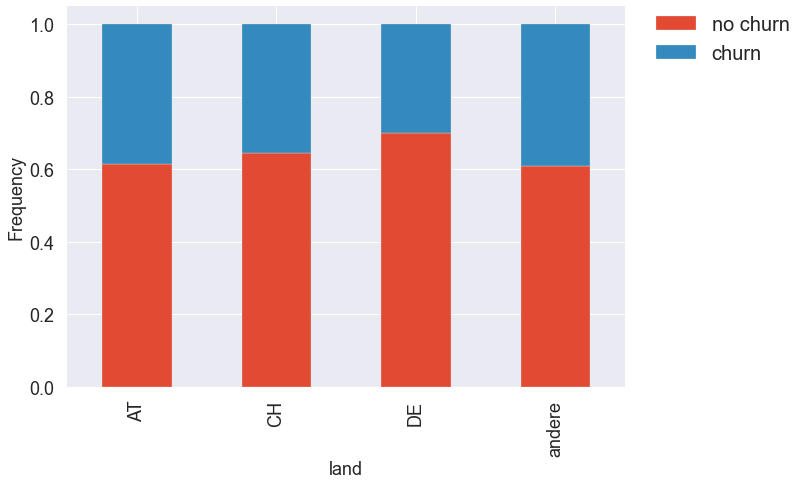

In [42]:
land_iso_churn = crosstab_evaluation(df.land_iso_code,df.churn)
crosstab_barplot(land_iso_churn,['no churn','churn'],xlabelname='land')

### Ort/City

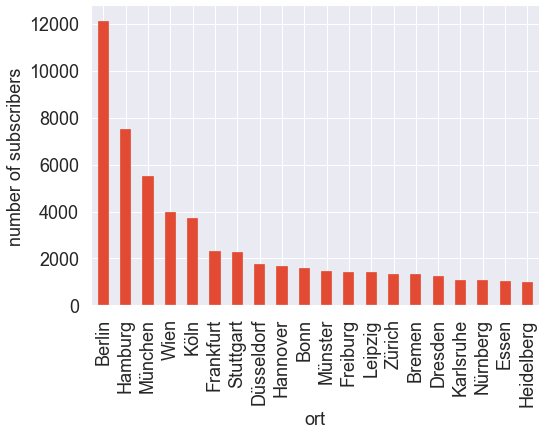

In [43]:
a = df.groupby('ort').size().nlargest(20)
a.plot(kind='bar',ylabel='number of subscribers');

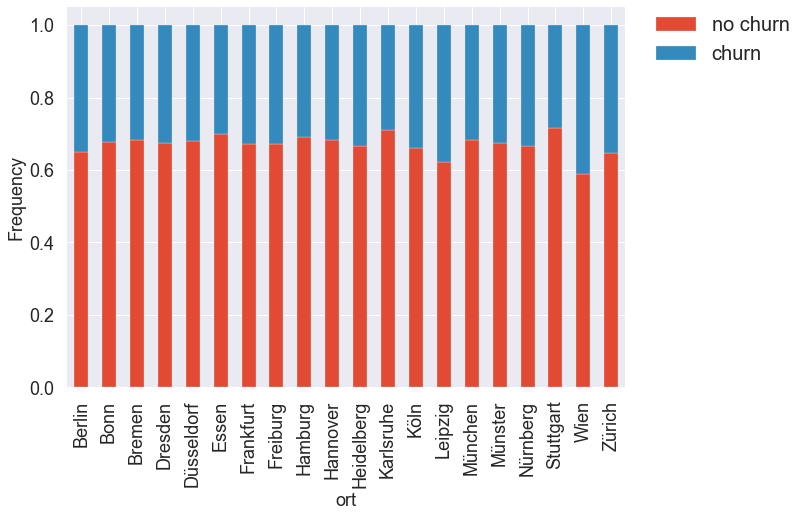

In [44]:
b = list(a.index)
df_top_cities = df[df['ort'].apply((lambda x: x in b))]

ort_churn = crosstab_evaluation(df_top_cities.ort,df_top_cities.churn)
crosstab_barplot(ort_churn,['no churn','churn'],xlabelname='ort')

### Summary Customer Data

## Subscription Features - Jonas

The following features are related to the subscription kind and shortly described:

- kanal
- objekt_name 
- aboform_name
- zahlung_rhythmus_name
- rechnungsmonat
- zahlung_weg_name 
- studentenabo
- unterbrechung

### Kanal

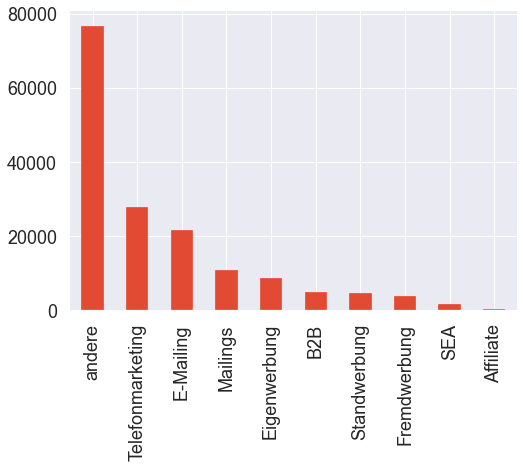

In [45]:
df.kanal.value_counts().plot(kind='bar');

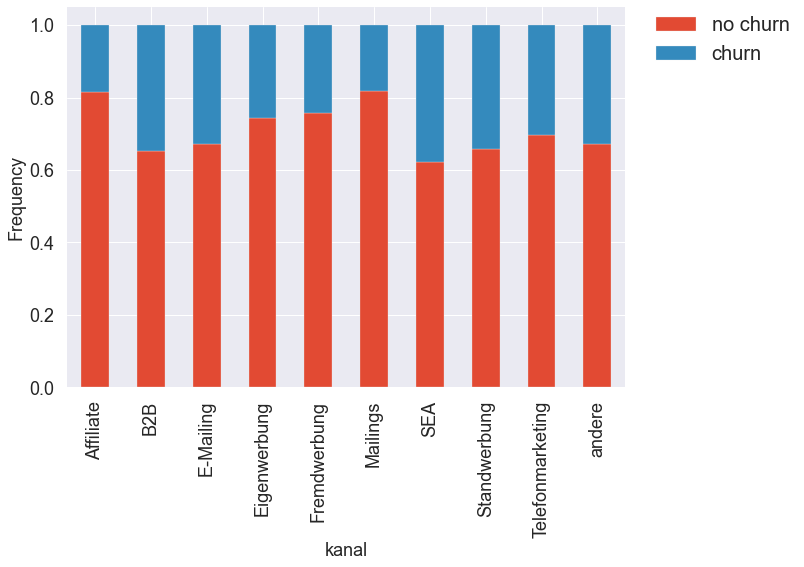

In [46]:
kanal_churn = crosstab_evaluation(df.kanal,df.churn)
crosstab_barplot(kanal_churn,['no churn','churn'],xlabelname='kanal')

(0.0, 10.0)

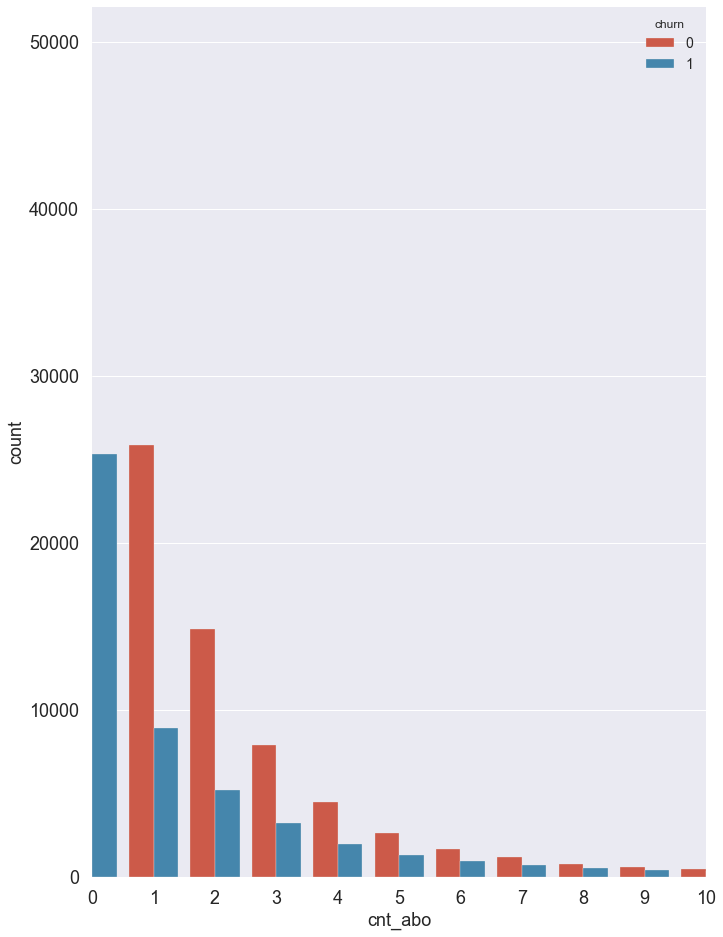

In [47]:
fig, ax = plt.subplots(figsize=(11,16))
ax = sns.countplot(x="cnt_abo", hue='churn',data=df)
ax.set_xlim(0,10)

### objekt_name

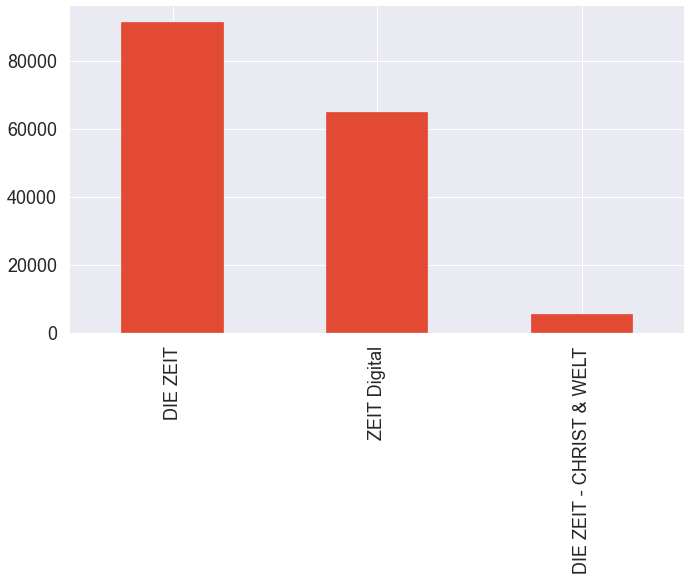

In [48]:
df.objekt_name.value_counts().plot(kind='bar',figsize=(11,6));

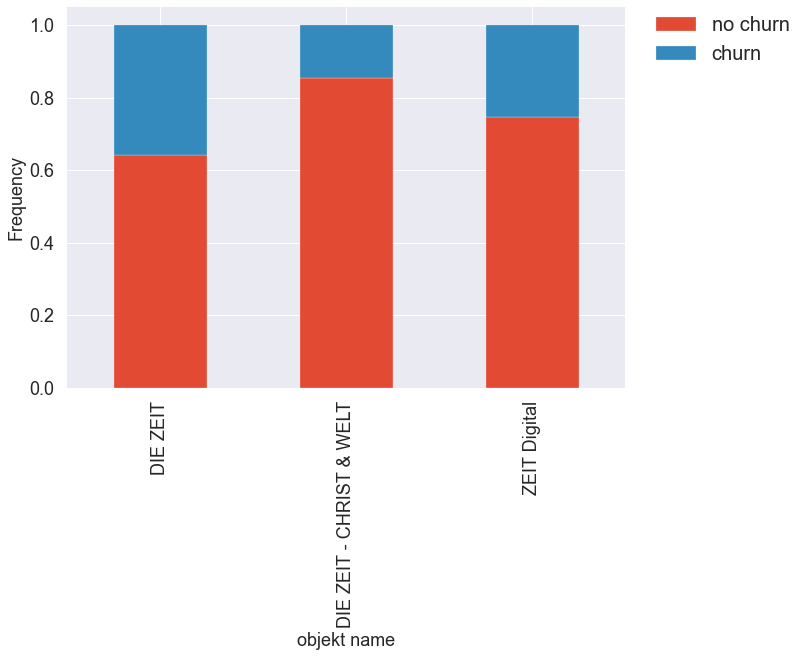

In [49]:
objekt_churn = crosstab_evaluation(df.objekt_name,df.churn)
crosstab_barplot(objekt_churn,['no churn','churn'],xlabelname='objekt name')

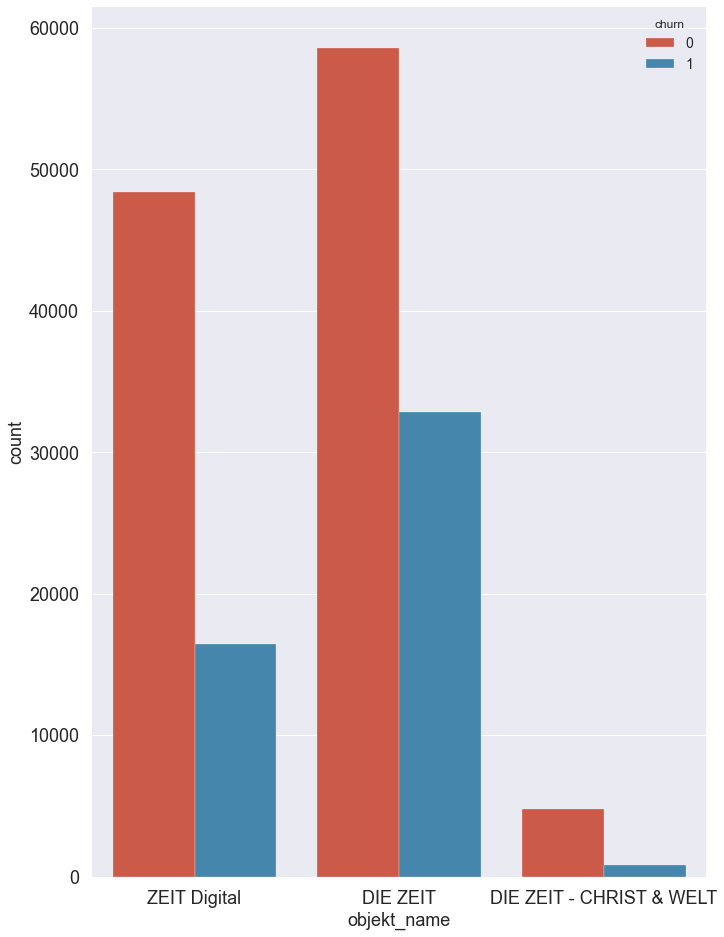

In [50]:
fig, ax = plt.subplots(figsize=(11,16))
ax = sns.countplot(x="objekt_name", hue='churn',data=df)

### aboform_name

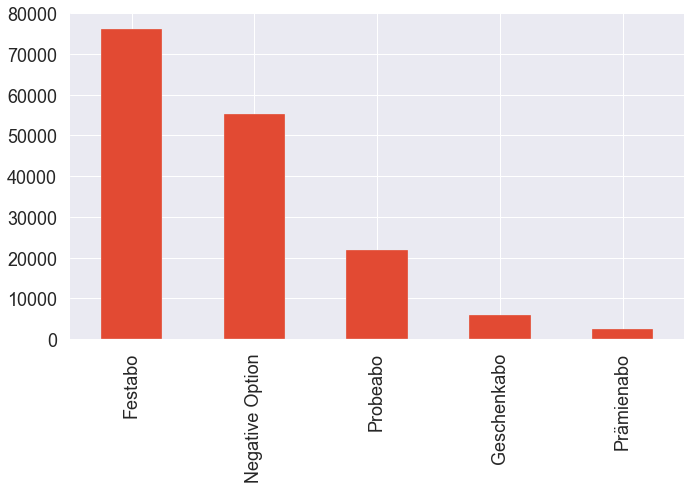

In [51]:
df.aboform_name.value_counts().plot(kind='bar',figsize=(11,6));

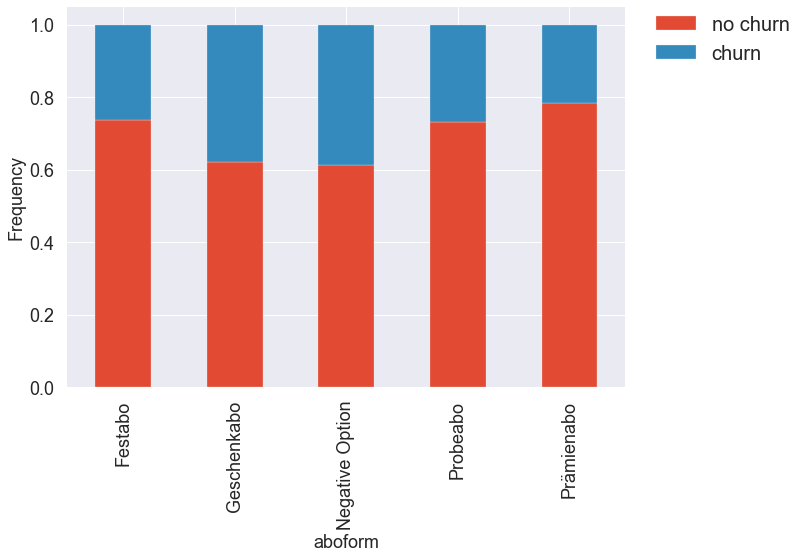

In [52]:
aboform_churn = crosstab_evaluation(df.aboform_name,df.churn)
crosstab_barplot(aboform_churn,['no churn','churn'],xlabelname='aboform')

### zahlung_rhythmus_name

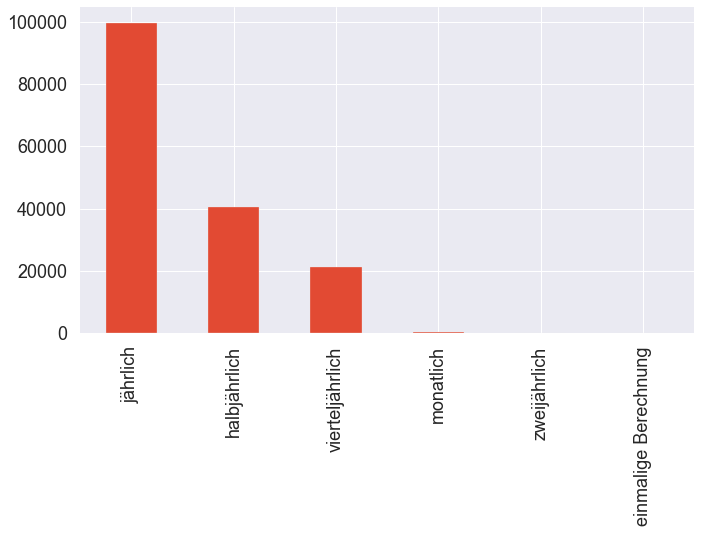

In [53]:
df.zahlung_rhythmus_name.value_counts().plot(kind='bar',figsize=(11,6));

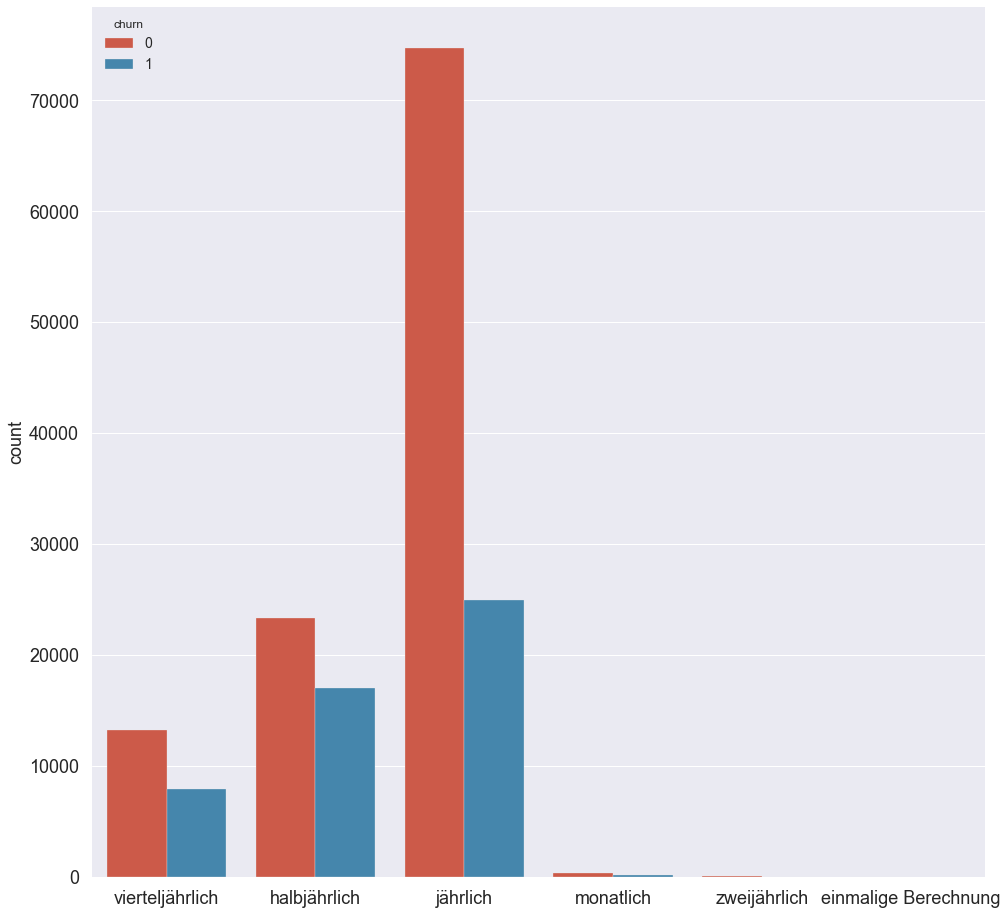

In [54]:
fig, ax = plt.subplots(figsize=(16,16))
ax = sns.countplot(x='zahlung_rhythmus_name',data=df,hue='churn')
ax.set_xlabel('');

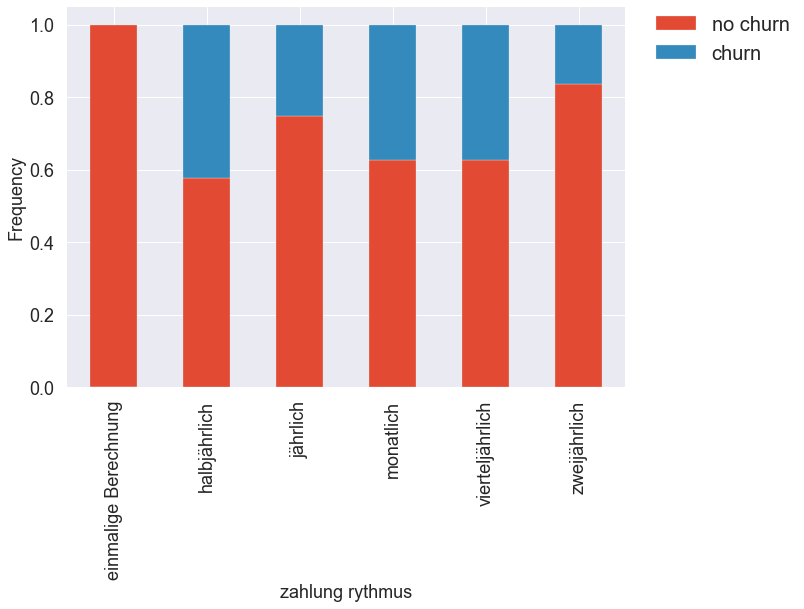

In [55]:
zahlung_rythmus_churn = crosstab_evaluation(df.zahlung_rhythmus_name,df.churn)
crosstab_barplot(zahlung_rythmus_churn,['no churn','churn'],xlabelname='zahlung rythmus')

### rechnungsmonat

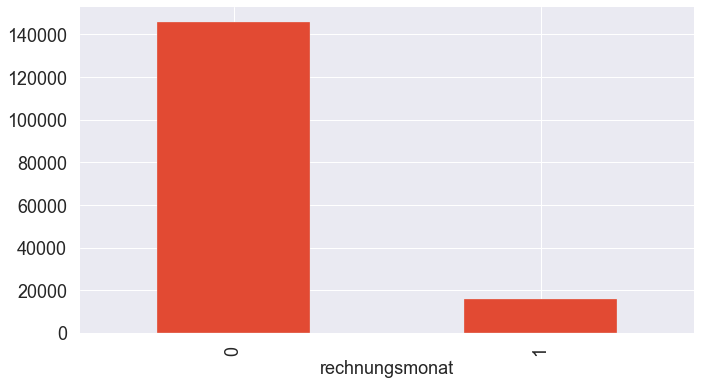

In [56]:
df.rechnungsmonat.value_counts().plot(kind='bar',figsize=(11,6));
plt.xlabel('rechnungsmonat');

Rechnungsmonat? What is the meaning?

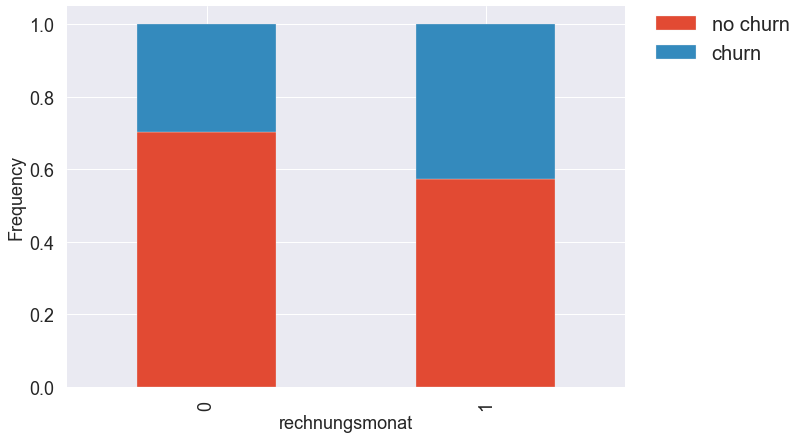

In [57]:
rechnungsmonat_churn = crosstab_evaluation(df.rechnungsmonat,df.churn)
crosstab_barplot(rechnungsmonat_churn,['no churn','churn'],xlabelname='rechnungsmonat')

### zahlung_weg_name

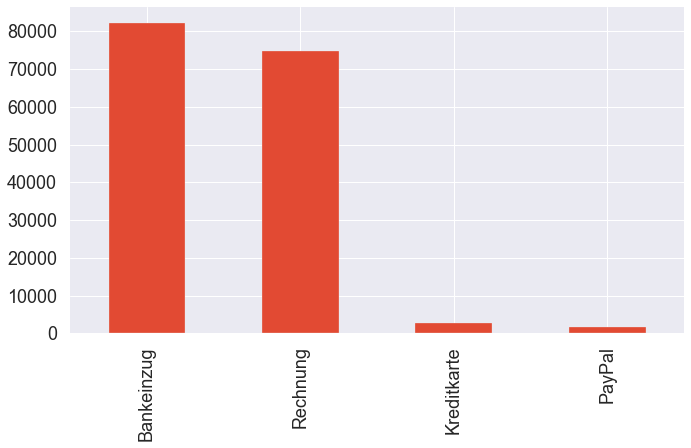

In [58]:
df.zahlung_weg_name.value_counts().plot(kind='bar',figsize=(11,6));

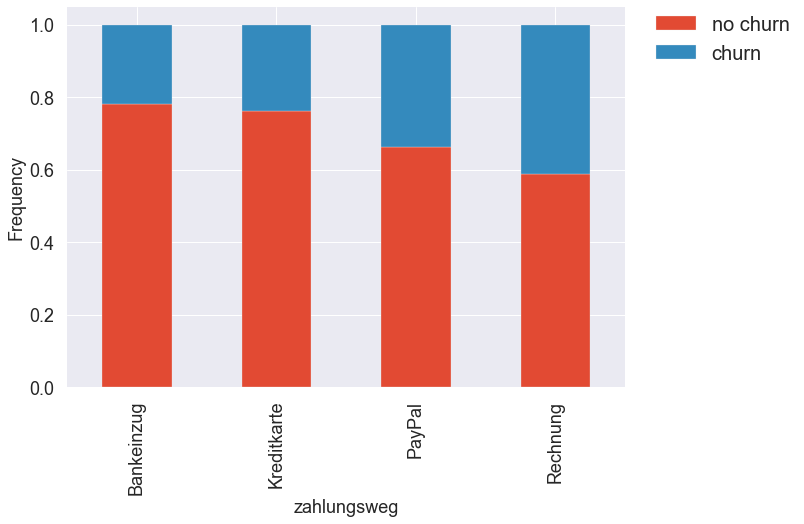

In [59]:
zahlungsweg_churn = crosstab_evaluation(df.zahlung_weg_name,df.churn)
crosstab_barplot(zahlungsweg_churn,['no churn','churn'],xlabelname='zahlungsweg')

### studentenabo

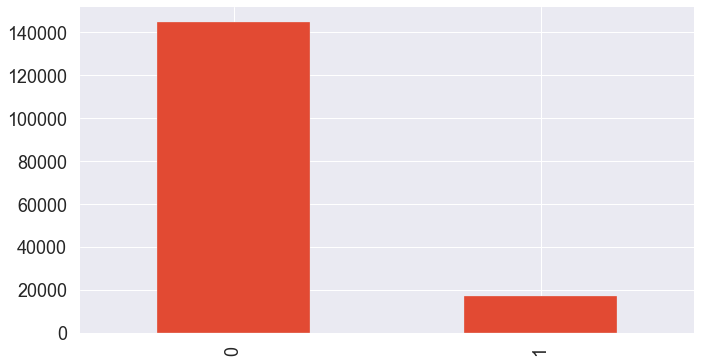

In [60]:
df.studentenabo.value_counts().plot(kind='bar',figsize=(11,6));

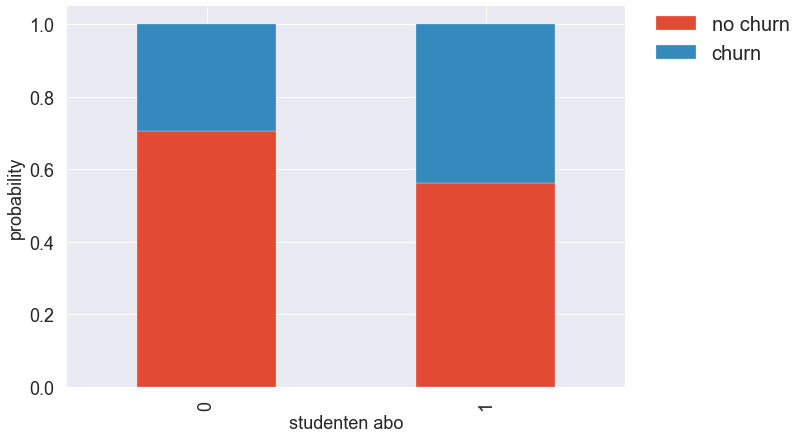

In [61]:
studentenabo_churn = crosstab_evaluation(df.studentenabo,df.churn)
crosstab_barplot(studentenabo_churn,['no churn','churn'],xlabelname='studenten abo')
plt.ylabel('probability');

#### Studentenmap

In [67]:
plz3_students = crosstab_evaluation(df.plz_3,df.studentenabo)
#crosstab_barplot(plz3_students,['no student abo','student abo'],xlabelname='PLZ 3',figsize_x=50)

In [63]:
def convert_plz_3_to_student(plz):
    index = str(plz)[0:3]
    #print(index)
    value = plz3_students[plz3_students.index == index].iloc[0,1]
    #print(value)
    return value

In [64]:
germany_df['studenten_plz_3'] = germany_df.plz.apply(lambda x: convert_plz_3_to_student(x))

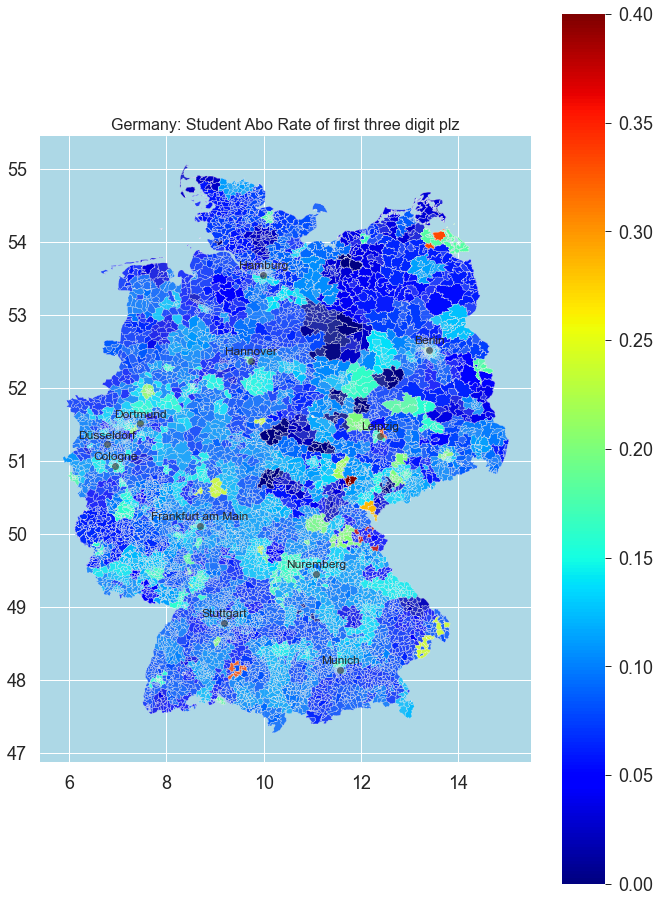

In [73]:
fig, ax = plt.subplots(figsize=(11,16))

germany_df.plot(
    ax=ax, 
    column='studenten_plz_3', 
    categorical=False, 
    legend=True, 
    cmap='jet',
    alpha=0.8,

)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )
    
ax.set(
    title='Germany: Student Abo Rate of first three digit plz', 
    aspect=1.5, 
    facecolor='lightblue'
);
fig.savefig('plots/student_abo_rate.png',dpi=300)

### unterbrechung

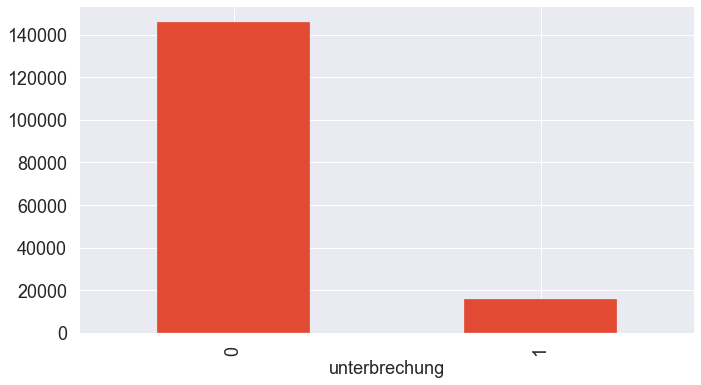

In [68]:
df.unterbrechung.value_counts().plot(kind='bar',figsize=(11,6));
plt.xlabel('unterbrechung');

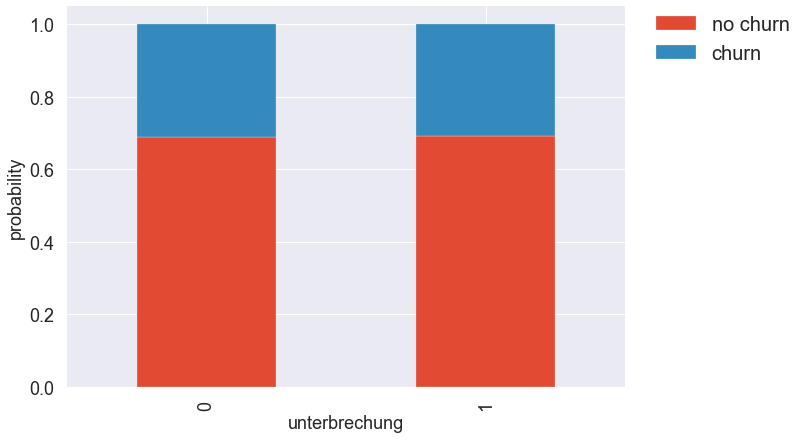

In [69]:
unterbrechung_churn = crosstab_evaluation(df.unterbrechung,df.churn)
crosstab_barplot(unterbrechung_churn,['no churn','churn'],xlabelname='unterbrechung')
plt.ylabel('probability');

### Summary Subscription Data

## Time/Temporal Features

The following features are related to time subscription kind and shortly described: 
- lesedauer
- liefer_beginn_evt
- abo_registrierung_min
- nl_registrierung_min

### lesedauer

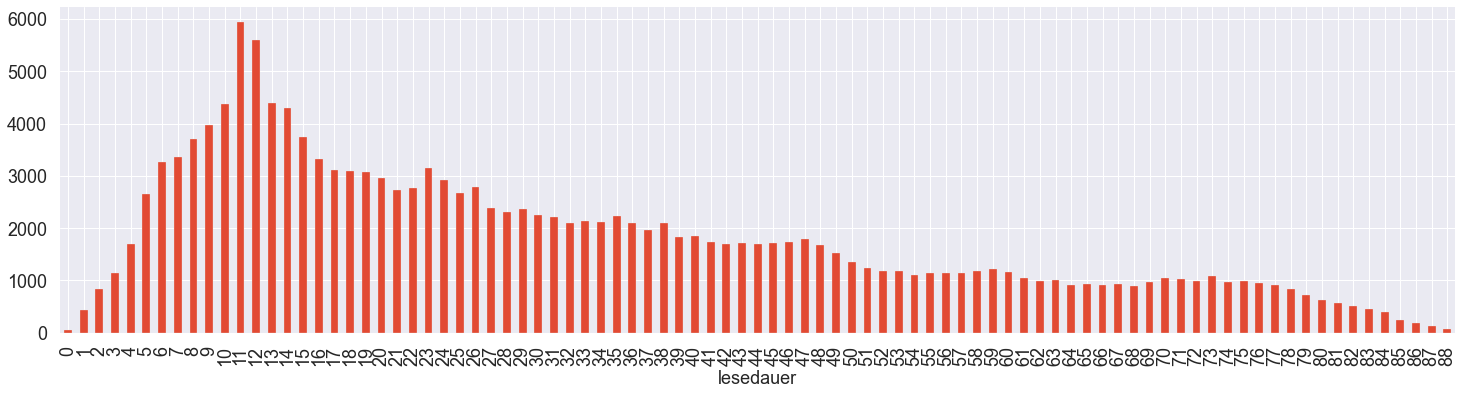

In [70]:
df.lesedauer.value_counts().sort_index().plot(kind='bar',figsize=(25,6));
#df.lesedauer.value_counts().sort_values('lesedauer').plot(kind='bar',figsize=(25,6));
plt.xlabel('lesedauer');

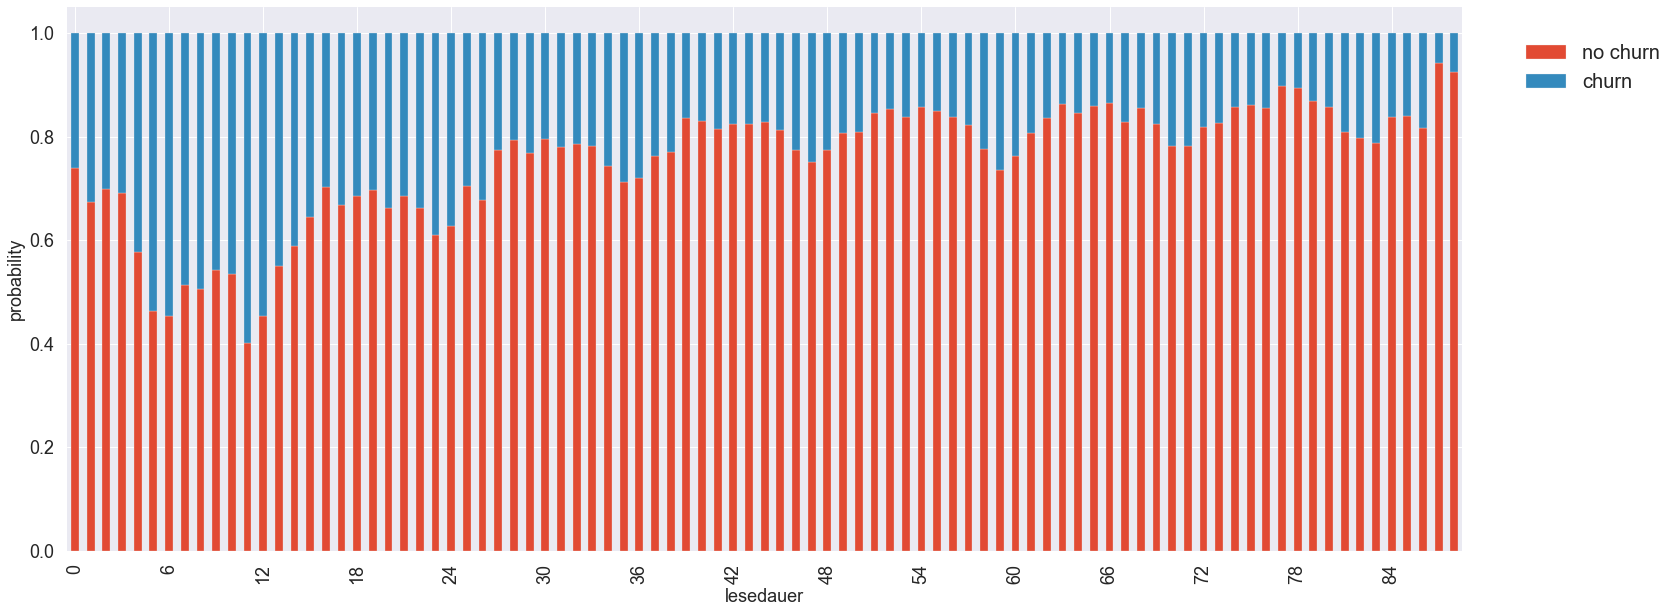

In [71]:
lesedauer_churn = crosstab_evaluation(df.lesedauer,df.churn)
crosstab_barplot(lesedauer_churn,['no churn','churn'],xlabelname='lesedauer',figsize_x=25,figsize_y=10)
plt.ylabel('probability');
plt.xticks(np.arange(0, 88, 6.0));

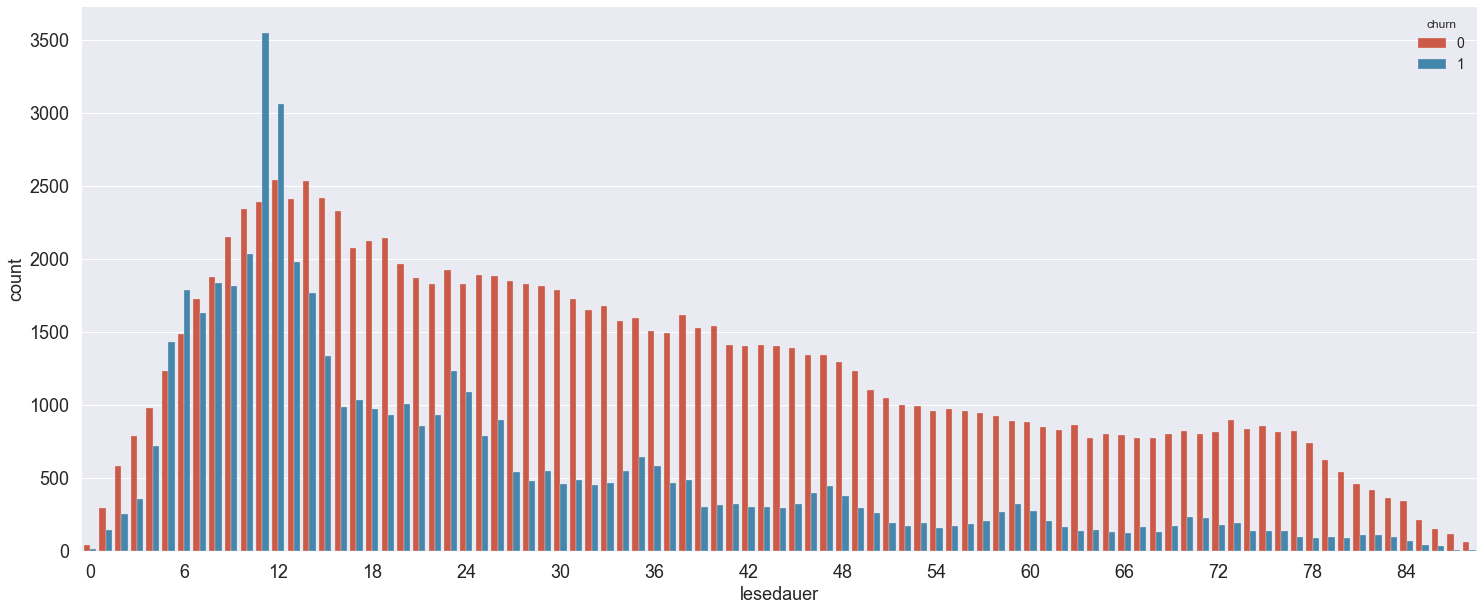

In [72]:
fig, ax = plt.subplots(figsize=(25,10))
ax = sns.countplot(x='lesedauer',data=df,hue='churn')
ax.set_xlabel('');
plt.xticks(np.arange(0, 88, 6.0));
plt.xlabel('lesedauer');

## Activity features

These features were we can see interactions and communicate with the customers.

- newsletter
- clickrates
- openrates
- community

In [ ]:
index=0
for elem in df.columns:
    index+=1
    print(f"{index} {elem}")

In [ ]:
df_zon = df.iloc[::, 21:35]                # zones are special areas that need registration
df_cnt = df.iloc[::, 35:40]                # cnt is the number of subscribtions the contract holds (families, libaries etc.)
df_nl = df.iloc[::, 41:51]                 # newsletter
df_nl_interact = df.iloc[::, 55:77]        # newsletter interactions
df_nl_bestandskunden = df.iloc[::, 77:99]  # newsletter existing customers
df_nl_produktnews = df.iloc[::, 99:121]    # productnews (kind of newsletter but more commercial)
df_nl_hamburg = df.iloc[::, 121:143]       # newsletter region hamburg
df_zb = df.iloc[::, 143:165]               # zb = zeitbrief kind of letter

In [ ]:
df_list = [df, df_zon, df_cnt, df_nl, df_nl_interact, df_nl_bestandskunden, df_nl_produktnews, df_nl_hamburg, df_zb]

#for elem in df_list:
#    eda.correlogram(elem)

## Target Variable Analysis

Our target variable is "churn", which is 1 - churn or 0 - no churn. 

## Feature Analysis

## Observation of histograms for distribution characteristics

## Correlogram for continuous variables - Heatmap

## Overal Skew and Kurtosis of the data

## Final Feature Selection List and Dropping of Features

## Statistical distribution of our target default

## Export the dataframe to .csv file

## Conclusion

# Feature Engineering

# Predictive Modelling

## Structure of the notebooks for machine learning

We used different jupyter notebook for different methods of machine learning. These notebooks are linked here:
    
- ...

- ...

- ...

- ...

# Data Visualization

The results and our main finding can be found in our presentation:

# Future Work

The aspects of future work can be found in our presentation. 